In [1]:
!pip install world_bank_data --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11110 sha256=7bf9ddb314884a5bda7a040a96b464bf16b15dcb0d0f39b41654311b5be4cab6
  Stored in directory: /root/.cache/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


In [2]:
import os
import json
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

import world_bank_data as wb

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Northeastern/Projects/IE6600 Final Project/

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Northeastern/Projects/IE6600 Final Project/'
/content


## ways to get 'country_chosen' List

In [ ]:
from google.colab import files
files.upload()

In [15]:
data_chosen = pd.read_csv('World Bank Selected Indicators - Sheet1.csv')

## This is separate line

In [ ]:
indicators = list(wi_df['Indicator Code'].dropna())
indicators

In [ ]:
data = pd.DataFrame()
for ind in indicators:
    data2 = wb.get_series(ind, date='1990:2020', id_or_value='id', simplify_index=True)
    data = pd.concat([data, data2], axis=1)

In [ ]:
data.to_csv('Data/All_Indicators_Data.csv')

In [ ]:
!ls -la

total 8101
-rw------- 1 root root 8168758 Dec 12 23:33  All_Indicators_Data.csv
drwx------ 2 root root    4096 Nov 15 00:27  Codes
drwx------ 2 root root    4096 Dec  4 05:44  config
drwx------ 2 root root    4096 Nov 13 20:17  Data
-rw------- 1 root root   12479 Nov 22 19:35 'IE6600 19905 Project Guidelines.docx'
-rw------- 1 root root   13032 Nov 16 22:57 'IE6600 Factors influencing Inflation and Recession.docx'
drwx------ 2 root root    4096 Nov 13 21:21  Video
-rw------- 1 root root   61743 Dec  9 05:02  visualizing_missing_data_with_barplot_Seaborn_distplot.png
-rw------- 1 root root     178 Dec  9 04:57 'World Bank Selected Indicators.gsheet'
-rw------- 1 root root   20663 Dec  9 04:58 'World Bank Selected Indicators - Sheet1.csv'


In [ ]:
data = pd.read_csv('All_Indicators_Data.csv', index_col=([0,1]))
data

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
AFE 1990          -0.039677             NaN                NaN   
    1991           0.105301             NaN                NaN   
    1992          -1.979118             NaN                NaN   
    1993          -0.392300             NaN                NaN   
    1994           2.025857             NaN                NaN   
...                     ...             ...                ...   
ZWE 2016           0.755869     142501584.0          25.236347   
    2017           4.709492     229797540.0          28.413719   
    2018           4.824211     761307154.0          20.697183   
    2019          -6.144236             NaN                NaN   
    2020          -6.248748             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
AFE 1990                NaN    2.532240e+11  ...    59.305126   
    1991                NaN    2.734028e+11  ...    53.933170   
    1992                NaN    2.382554e+11  ...    53.950285   
    1993                NaN    2.365269e+11  ...    56.196562   
    1994                NaN    2.401201e+11  ...    61.210240   
...                     ...             ...  ...          ...   
ZWE 2016                NaN    2.054868e+10  ...    95.000000   
    2017                NaN    1.758489e+10  ...    90.000000   
    2018                NaN    1.811554e+10  ...    88.000000   
    2019                NaN    1.928429e+10  ...    85.000000   
    2020                NaN    1.805117e+10  ...    85.000000   

          SP.POP.1564.TO.ZS.1  SP.POP.1564.TO.ZS.2  SL.TLF.TOTL.IN  \
AFE 1990            51.430660            51.430660     120062718.0   
    1991            51.477748            51.477748     123616494.0   
    1992            51.587893            51.587893     127344638.0   
    1993            51.746670            51.746670     131230462.0   
    1994            51.937393            51.937393     135250938.0   
...                       ...                  ...             ...   
ZWE 2016            54.473134            54.473134       6802164.0   
    2017            54.505941            54.505941       6909356.0   
    2018            54.659410            54.659410       7028775.0   
    2019            54.861265            54.861265       7156060.0   
    2020            55.074722            55.074722       7204228.0   

          SP.POP.1564.TO  
AFE 1990     156682481.0  
    1991     161328531.0  
    1992     166252340.0  
    1993     171418905.0  
    1994     176784467.0  
...                  ...  
ZWE 2016       7642765.0  
    2017       7759792.0  
    2018       7892169.0  
    2019       8034692.0  
    2020       8185716.0  

[8246 rows x 102 columns]

In [ ]:
def calculate_quality(data, rate):
    missing_list = []
    for i in range(data.shape[1]):
        missing_ind = []
        missing_country = []
        if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:    
            missing_cy = data[data.iloc[:,i].isna() == True].index
            [missing_country.append(ms_cnt) for (ms_cnt, _) in missing_cy]
            missing_country = list(set(missing_country))
            missing_ind = data.columns[i]
            missing_list.append(tuple([missing_ind, len(missing_country), missing_country]))
    print(f'There are {len(missing_list)} columns with missing value rate larger than {100*rate}%')
    return missing_list

In [ ]:
chosen =['AUS',
 'KOR',
 'PHL',
 'SGP',
 'THA',
 'GBR',
 'HUN',
 'ROU',
 'SWE',
 'JAM',
 'PER',
 'JOR',
 'USA',
 'IND']

In [ ]:
chosen_data = data.loc[chosen,:,:]
chosen_data

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
AUS 1990           3.573507    7.364000e+09          21.822977   
    1991          -0.395087    6.192000e+09          23.171087   
    1992           0.413780    5.748000e+09          24.439892   
    1993           4.033567    5.413000e+09          24.969497   
    1994           3.980474    6.630000e+09          25.092045   
...                     ...             ...                ...   
IND 2016           8.256306    4.791960e+12          15.271950   
    2017           6.795383    5.292460e+12          15.614110   
    2018           6.453851    5.741910e+12          15.663132   
    2019           3.737919             NaN                NaN   
    2020          -6.596081             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
AUS 1990          12.231535    3.113267e+11  ...         86.0   
    1991          11.921499    3.259030e+11  ...         86.0   
    1992          14.147185    3.254803e+11  ...         86.0   
    1993          17.874332    3.121262e+11  ...         86.0   
    1994          20.188463    3.228073e+11  ...         86.0   
...                     ...             ...  ...          ...   
IND 2016          47.633756    2.294798e+12  ...         88.0   
    2017          47.583609    2.651473e+12  ...         90.0   
    2018          46.522499    2.702930e+12  ...         93.0   
    2019                NaN    2.831552e+12  ...         95.0   
    2020                NaN    2.667688e+12  ...         89.0   

          SP.POP.1564.TO.ZS.1  SP.POP.1564.TO.ZS.2  SL.TLF.TOTL.IN  \
AUS 1990            66.851833            66.851833       8475893.0   
    1991            66.860327            66.860327       8524976.0   
    1992            66.781131            66.781131       8601726.0   
    1993            66.662599            66.662599       8634061.0   
    1994            66.582205            66.582205       8799677.0   
...                       ...                  ...             ...   
IND 2016            66.274262            66.274262     469541836.0   
    2017            66.538187            66.538187     471675710.0   
    2018            66.766742            66.766742     473422438.0   
    2019            67.003811            67.003811     482700285.0   
    2020            67.265500            67.265500     457779812.0   

          SP.POP.1564.TO  
AUS 1990      11408332.0  
    1991      11556139.0  
    1992      11683359.0  
    1993      11777281.0  
    1994      11888253.0  
...                  ...  
IND 2016     877814039.0  
    2017     890731260.0  
    2018     903115190.0  
    2019     915551973.0  
    2020     928266848.0  

[434 rows x 102 columns]

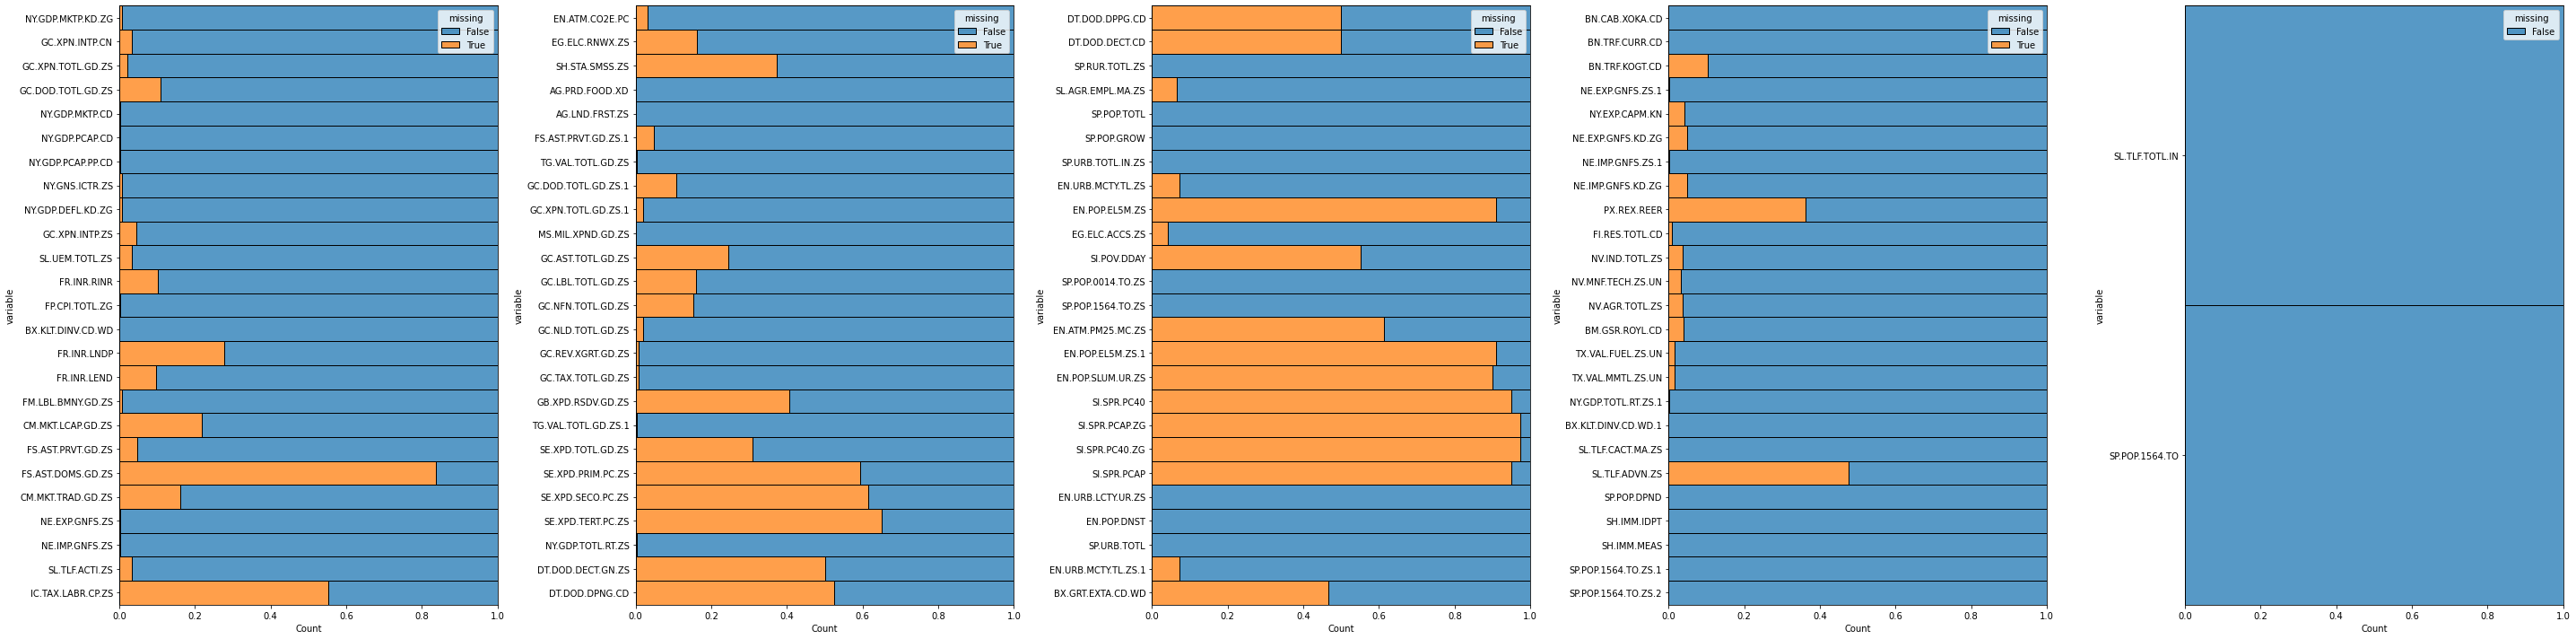

In [ ]:
fig, axs = plt.subplots(1, 5, figsize = (40,10))
for i in range(5):
    sns.histplot(
        data=chosen_data.iloc[:,i*25:(i+1)*25].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        ax = axs[i]
    )
plt.tight_layout()
# plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
for x in data.columns:
    print(x) 

NY.GDP.MKTP.KD.ZG
GC.XPN.INTP.CN
GC.XPN.TOTL.GD.ZS
GC.DOD.TOTL.GD.ZS
NY.GDP.MKTP.CD
NY.GDP.PCAP.CD
NY.GDP.PCAP.PP.CD
NY.GNS.ICTR.ZS
NY.GDP.DEFL.KD.ZG
GC.XPN.INTP.ZS
SL.UEM.TOTL.ZS
FR.INR.RINR
FP.CPI.TOTL.ZG
BX.KLT.DINV.CD.WD
FR.INR.LNDP
FR.INR.LEND
FM.LBL.BMNY.GD.ZS
CM.MKT.LCAP.GD.ZS
FS.AST.PRVT.GD.ZS
FS.AST.DOMS.GD.ZS
CM.MKT.TRAD.GD.ZS
NE.EXP.GNFS.ZS
NE.IMP.GNFS.ZS
SL.TLF.ACTI.ZS
IC.TAX.LABR.CP.ZS
EN.ATM.CO2E.PC
EG.ELC.RNWX.ZS
SH.STA.SMSS.ZS
AG.PRD.FOOD.XD
AG.LND.FRST.ZS
FS.AST.PRVT.GD.ZS.1
TG.VAL.TOTL.GD.ZS
GC.DOD.TOTL.GD.ZS.1
GC.XPN.TOTL.GD.ZS.1
MS.MIL.XPND.GD.ZS
GC.AST.TOTL.GD.ZS
GC.LBL.TOTL.GD.ZS
GC.NFN.TOTL.GD.ZS
GC.NLD.TOTL.GD.ZS
GC.REV.XGRT.GD.ZS
GC.TAX.TOTL.GD.ZS
GB.XPD.RSDV.GD.ZS
TG.VAL.TOTL.GD.ZS.1
SE.XPD.TOTL.GD.ZS
SE.XPD.PRIM.PC.ZS
SE.XPD.SECO.PC.ZS
SE.XPD.TERT.PC.ZS
NY.GDP.TOTL.RT.ZS
DT.DOD.DECT.GN.ZS
DT.DOD.DPNG.CD
DT.DOD.DPPG.CD
DT.DOD.DECT.CD
SP.RUR.TOTL.ZS
SL.AGR.EMPL.MA.ZS
SP.POP.TOTL
SP.POP.GROW
SP.URB.TOTL.IN.ZS
EN.URB.MCTY.TL.ZS
EN.POP.EL5M.ZS
EG.ELC.ACCS.ZS
SI.PO

In [ ]:
b = pd.DataFrame()
a = ['FS.AST.DOMS.GD.ZS', 'IC.TAX.LABR.CP.ZS', 'SE.XPD.TOTL.GD.ZS', 'SE.XPD.PRIM.PC.ZS', 'SE.XPD.SECO.PC.ZS', 'SE.XPD.TERT.PC.ZS',
     'EN.POP.EL5M.ZS', 'EN.ATM.PM25.MC.ZS','EN.POP.SLUM.UR.ZS','SI.SPR.PCAP.ZG','SI.SPR.PC40.ZG','SI.SPR.PCAP', 'SI.SPR.PC40',
     'SL.TLF.ADVN.ZS', 'SH.STA.SMSS.ZS', 'GB.XPD.RSDV.GD.ZS', 'DT.DOD.DECT.GN.ZS', 'DT.DOD.DPNG.CD', 'BX.GRT.EXTA.CD.WD'

]
for c in a:
    b = pd.concat([b, wb.get_indicators(c)])

b.head(20)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
FS.AST.DOMS.GD.ZS,Domestic credit provided by financial sector (...,,World Development Indicators,Domestic credit provided by the financial sect...,"International Monetary Fund, International Fin...",Financial Sector
IC.TAX.LABR.CP.ZS,Labor tax and contributions (% of commercial p...,,World Development Indicators,Labor tax and contributions is the amount of t...,"World Bank, Doing Business project (http://www...",Private Sector
SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ...",,World Development Indicators,General government expenditure on education (c...,UNESCO Institute for Statistics (http://uis.un...,Education
SE.XPD.PRIM.PC.ZS,"Government expenditure per student, primary (%...",,World Development Indicators,Government expenditure per student is the aver...,UNESCO Institute for Statistics (http://uis.un...,Education
SE.XPD.SECO.PC.ZS,"Government expenditure per student, secondary ...",,World Development Indicators,Government expenditure per student is the aver...,UNESCO Institute for Statistics (http://uis.un...,Education
...,...,...,...,...,...,...
SH.STA.SMSS.ZS,People using safely managed sanitation service...,,World Development Indicators,The percentage of people using improved sanita...,WHO/UNICEF Joint Monitoring Programme (JMP) fo...,"Health ,Environment"
GB.XPD.RSDV.GD.ZS,Research and development expenditure (% of GDP),,World Development Indicators,Gross domestic expenditures on research and de...,UNESCO Institute for Statistics (http://uis.un...,Science & Technology
DT.DOD.DECT.GN.ZS,External debt stocks (% of GNI),,World Development Indicators,Total external debt stocks to gross national i...,"World Bank, International Debt Statistics.","Economy & Growth,External Debt"


In [ ]:
chosen_data2 = chosen_data.drop(columns=a, axis=1)
chosen_data2.shape

(434, 83)

In [ ]:
chosen_data2

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
AUS 1990           3.573507    7.364000e+09          21.822977   
    1991          -0.395087    6.192000e+09          23.171087   
    1992           0.413780    5.748000e+09          24.439892   
    1993           4.033567    5.413000e+09          24.969497   
    1994           3.980474    6.630000e+09          25.092045   
...                     ...             ...                ...   
IND 2016           8.256306    4.791960e+12          15.271950   
    2017           6.795383    5.292460e+12          15.614110   
    2018           6.453851    5.741910e+12          15.663132   
    2019           3.737919             NaN                NaN   
    2020          -6.596081             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
AUS 1990          12.231535    3.113267e+11  ...         86.0   
    1991          11.921499    3.259030e+11  ...         86.0   
    1992          14.147185    3.254803e+11  ...         86.0   
    1993          17.874332    3.121262e+11  ...         86.0   
    1994          20.188463    3.228073e+11  ...         86.0   
...                     ...             ...  ...          ...   
IND 2016          47.633756    2.294798e+12  ...         88.0   
    2017          47.583609    2.651473e+12  ...         90.0   
    2018          46.522499    2.702930e+12  ...         93.0   
    2019                NaN    2.831552e+12  ...         95.0   
    2020                NaN    2.667688e+12  ...         89.0   

          SP.POP.1564.TO.ZS.1  SP.POP.1564.TO.ZS.2  SL.TLF.TOTL.IN  \
AUS 1990            66.851833            66.851833       8475893.0   
    1991            66.860327            66.860327       8524976.0   
    1992            66.781131            66.781131       8601726.0   
    1993            66.662599            66.662599       8634061.0   
    1994            66.582205            66.582205       8799677.0   
...                       ...                  ...             ...   
IND 2016            66.274262            66.274262     469541836.0   
    2017            66.538187            66.538187     471675710.0   
    2018            66.766742            66.766742     473422438.0   
    2019            67.003811            67.003811     482700285.0   
    2020            67.265500            67.265500     457779812.0   

          SP.POP.1564.TO  
AUS 1990      11408332.0  
    1991      11556139.0  
    1992      11683359.0  
    1993      11777281.0  
    1994      11888253.0  
...                  ...  
IND 2016     877814039.0  
    2017     890731260.0  
    2018     903115190.0  
    2019     915551973.0  
    2020     928266848.0  

[434 rows x 83 columns]

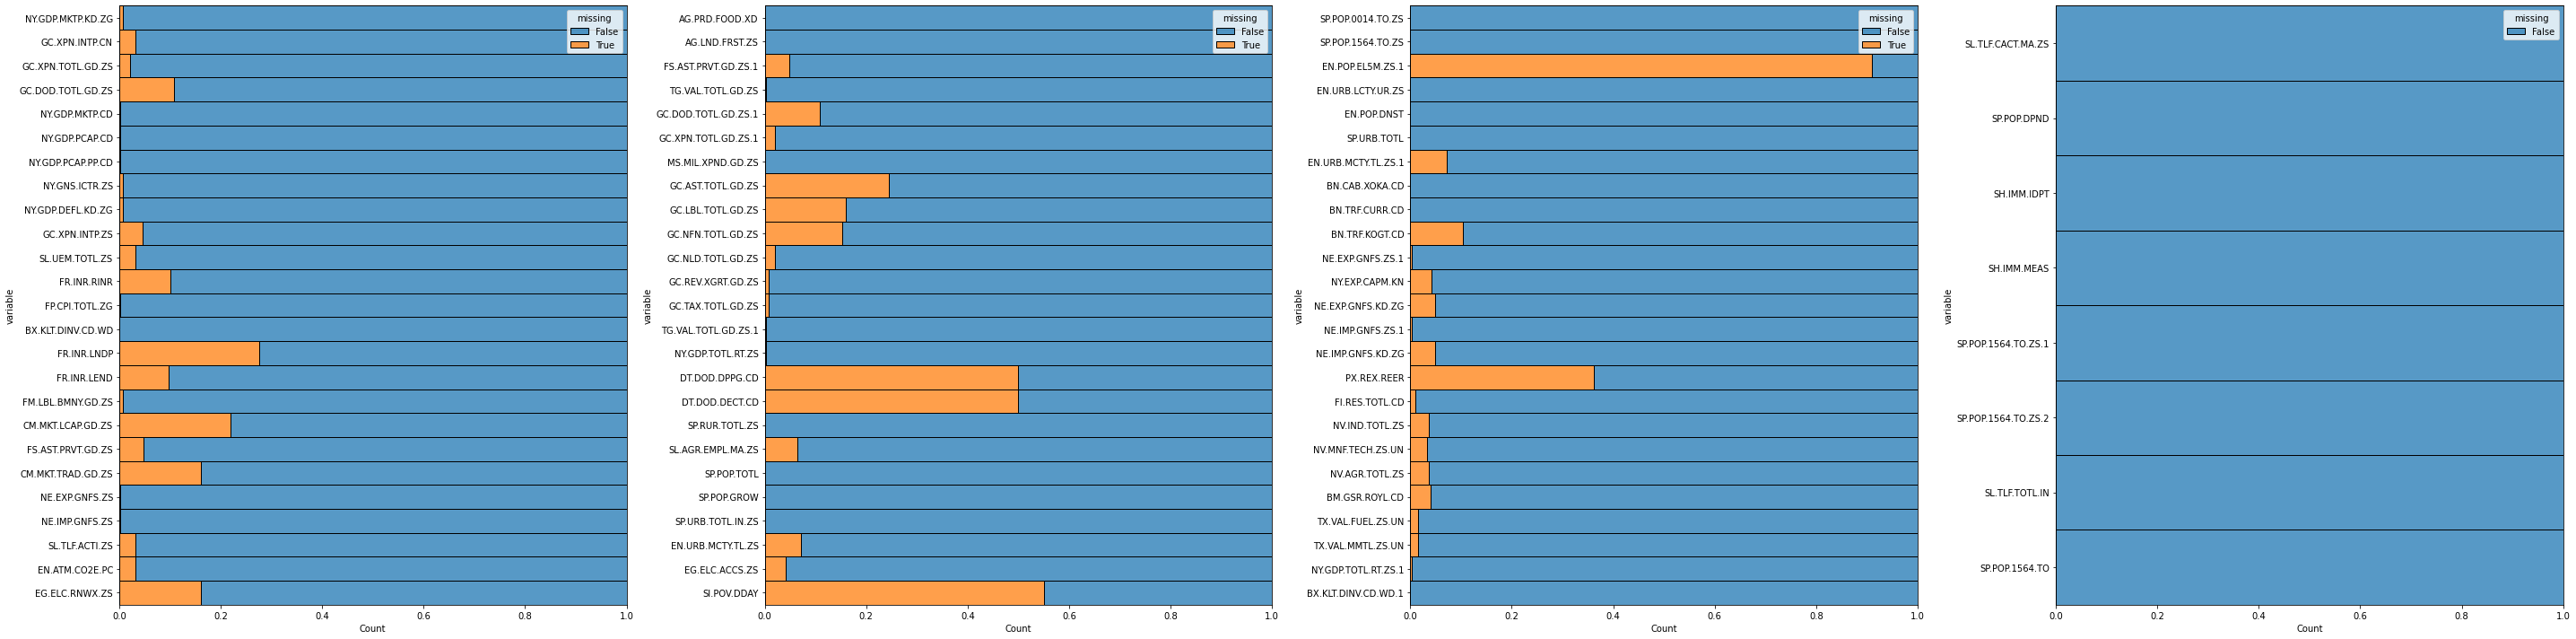

In [ ]:
fig, axs = plt.subplots(1, 4, figsize = (40,10))
for i in range(4):
    sns.histplot(
        data=chosen_data2.iloc[:,i*25:(i+1)*25].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        ax = axs[i]
    )
plt.tight_layout()
# plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
chosen_data2.reset_index(inplace=True)

In [ ]:
import plotly.express as px
fig = px.choropleth(chosen_data2, locations="level_0",
                    color="NY.GDP.MKTP.KD.ZG", 
                    hover_name="level_0",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    animation_frame='level_1',
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
chosen_data2.to_csv('Data/Cleaned_Data.csv')